# Agrupando datos

Inteligencia Artificial - Facundo A. Lucianna - CEIA - FIUBA

Un análisis EDA que vimos en el notebook anterior no nos alcanza completamente para entender los datos, principalmente cuando hay variables categóricas. Hasta ahora, estuvimos calculando un EDA para todas las filas de un conjunto de datos, pero los EDA pueden ser útiles para comparar diferentes grupos, dados por variables categóricas. Por ejemplo, ¿una raza de perro pesa más que otra en promedio? ¿Las colibríes hembra son más grandes que los machos? En este notebook vamos a aprender a trabajar cuando nuestros datos están formados por diferentes grupos.

En este notebook trabajaremos con un subset de datos de [AVONET](https://onlinelibrary.wiley.com/doi/10.1111/ele.13898). El cual es el registro de datos morfológicos, ecológicos y geográficos de pájaros. Las mediciones morfológicas son las de las siguiente [imagen](https://onlinelibrary.wiley.com/doi/10.1111/ele.13898)

Este es un subset de pequeño de especies de 11020 posibles. Y solo se eligieron las siguientes mediciones:

- **species**: Nombre de la especie.
- **sex**: Sexo del animal (macho, hembra o indefinido).
- **beak_length**: La distancia desde la punta de la mandíbula superior hasta el final del culmen en su intersección con el cere o la frente (Medida 1 de la imagen).
- **beak_depth**: Distancia entre la parte superior e inferior del pico (Medida 3 de la imagen).
- **tarsus_length**: Longitud desde el pliegue interior de la articulación tibiotarsiana hasta la base de los dedos (Medida 5 de la imagen).
- **wing_length**: La longitud del ala, la distancia entre la curva del ala y la pluma primaria más larga (Medida 6 de la imagen). 
- **tail_length**: La medida de la cola se toma desde la base de la cola hasta la punta de las plumas más largas (Medida 9 de la imagen). 

OBS: En las celdas de procesamiento si ves ___ es para que reemplaces.

Arranquemos cargando nuestro datos.

1. Importa `pandas` como `pd` 

In [1]:
import pandas as pd

2. Lea el csv `birds.csv` en un DataFrame y llame al DataFrame `birds`

In [2]:
birds = pd.read_csv("datasets/birds.csv")

3. Imprima la cabecera de `birds`. Ademas, explore la información sobre columnas.

In [3]:
birds.head()

,species,sex,beak_length,beak_depth,tarsus_length,wing_length,tail_length
0,Alethe diademata,F,20.6,5.7,24.0,96.0,76.0
1,Alethe diademata,M,17.8,5.6,22.1,92.0,84.0
2,Alethe diademata,M,18.3,4.8,26.4,92.0,87.0
3,Alethe diademata,F,18.1,5.0,24.1,86.0,77.0
4,Alethe diademata,U,NaN,NaN,NaN,88.0,69.0


In [4]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   species        3405 non-null   object 
 1   sex            3405 non-null   object 
 2   beak_length    1584 non-null   float64
 3   beak_depth     1705 non-null   float64
 4   tarsus_length  1899 non-null   float64
 5   wing_length    3364 non-null   float64
 6   tail_length    2998 non-null   float64
dtypes: float64(5), object(2)
memory usage: 186.3+ KB


## Explorando variables categóricas

Analizar una variable categórica con pocas categorías es relativamente sencilla. Se calcula la proporción de las categorías o al menos de las más importantes.

Vamos a trabajar con la columna `species` que contiene el nombre de las especies de pájaros.

1. Usando el método `.unique()` vea las categorías únicas que posee la columna `species` de `birds`.

In [5]:
birds["species"].unique()

array(['Alethe diademata', 'Bleda notatus', 'Cinnyris jugularis',
       'Cyanomitra olivacea', 'Eurillas latirostris',
       'Hylopezus perspicillatus', 'Malurus melanocephalus',
       'Mionectes oleagineus', 'Zosterops chloris',
       'Zosterops consobrinorum'], dtype=object)

Como vemos se encuentran 10 especies diferentes. Ahora vamos a calcular cuántas veces aparecen en `birds` cada especie.

2. Calcule usando `.value_counts()` la columna `species` de `birds`. Asignelo a `cuenta_species_birds`.

In [7]:
cuenta_species_birds = birds["species"].value_counts()

3. Cuente el total de filas de la columna `species` de `birds` usando `.count()`. Asignelo a `total_birds`.

In [8]:
total_birds = birds['species'].count()

4. Obtenga la proporción de cada categoría dividiendo `cuenta_species_birds` con `total_birds`. Asignelo a `proporcion_species_birds`.

In [9]:
proporcion_species_birds = cuenta_species_birds / total_birds

5. Muestre a `proporcion_species_birds`

In [10]:
proporcion_species_birds

species
Zosterops chloris           0.230250
Eurillas latirostris        0.154772
Cyanomitra olivacea         0.109545
Cinnyris jugularis          0.099266
Alethe diademata            0.094273
Malurus melanocephalus      0.067841
Zosterops consobrinorum     0.067548
Bleda notatus               0.064317
Mionectes oleagineus        0.059325
Hylopezus perspicillatus    0.052863
Name: count, dtype: float64

Como podemos ver 23% de los pájaros son [Zosterops chloris](https://es.wikipedia.org/wiki/Zosterops_chloris) y el que menos proporción tiene en el dataset es [Hylopezus perspicillatus](https://es.wikipedia.org/wiki/Hylopezus_perspicillatus).  

Los gráficos de barras son una herramienta visual común para mostrar una sola variable categórica. Las categorías se enumeran en el eje x y las frecuencias o proporciones en el eje y.

1. Grafique en un gráfico de barra `proporcion_species_birds` usando `.plot.bar()` de Pandas.

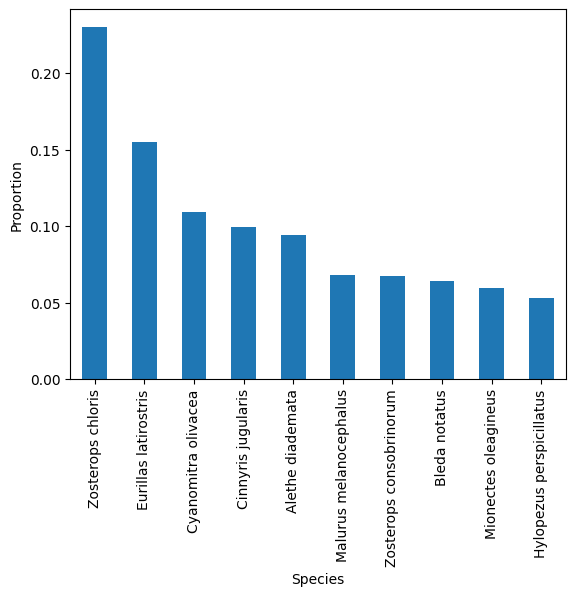

In [11]:
ax = proporcion_species_birds.plot.bar()
ax.set_ylabel("Proportion")
ax.set_xlabel("Species");

### Moda

La moda es el valor, o valores en caso de empate, que aparece con mayor frecuencia en los datos. En los casos de `birds`, la moda es **Zosterops chloris**. La moda es una estadística de resumen simple para datos categóricos y, por lo general, no se usa para datos numéricos.

----

La proporción en este dataset es la proporción de la muestra, la cual no es medida de la proporción de la población de pájaros. Generalizar a una población puede estar determinado por muchas situaciones de cómo fue tomada la muestra. En este caso depende del operador y comportamiento del animal, atrapar a un animal depende de qué especies es.

Ahora, hay casos que son más fáciles de lograr obtener la proporción de una población, principalmente con casos que tenemos control. Por ejemplo, si tenemos registros de usuarios en una página web y queremos ver que tipo de artículos compran. En estos casos no hay problemas de operador. Cuando tenemos la posibilidad de registrar todos los datos, gracias a big data, podemos procesar toda la población directamente. Si por algún motivo no se puede contar con herramientas de **Big Data**, se puede utilizar herramientas de inferencias estadística para poder estimar esta proporción. Con esto, estamos comentando que para resolver un problema como Data Scientist, se puede ser más tradicional usando herramientas estadísticas, así como resolver problemas con heurística, Big Data y Machine Learning. 

## Agrupando mediante variables categóricas y agregación de datos

Con las variables categóricas no solo podemos ver la proporción en un dataset, sino que nos permite realizar un análisis estadístico usando a estas variables como agrupadoras. Las variables categóricas cumplen en general el rol de separar, y es esperable que las variables numéricas, estadísticamente nos presenten información como para poder obtener nueva información de nuestro dataset. Por ejemplo, el sexo de un león determina variaciones en su peso y tamaño, o un nivel socioeconomico de la población va a tener diferentes rangos de ingresos y gastos mensuales. 

Como vimos en clase, Pandas nos permite agrupar los datos usando `.groupby()`.
`
1. Usando el método `.groupby()` agrupe usando `species` de `birds` y asignelo a `birds_grouped`

In [12]:
birds_grouped = birds.groupby(['species'])

`.groupby()` posee un atributo llamado `.groups` que nos devuelve los grupos formados y que filas (dado por el indice) pertenece a cada uno de los grupos. Si utilizamos con `.groups`, el método `.keys()`, podemos ver cada uno de los posibles grupos, en este caso a la especies de pájaros del dataset.

2. Usando `.groups.keys()` en `birds_grouped` muestre las diferentes especies de pájaros.

In [13]:
birds_grouped.groups.keys()

dict_keys(['Alethe diademata', 'Bleda notatus', 'Cinnyris jugularis', 'Cyanomitra olivacea', 'Eurillas latirostris', 'Hylopezus perspicillatus', 'Malurus melanocephalus', 'Mionectes oleagineus', 'Zosterops chloris', 'Zosterops consobrinorum'])

3. Usando `birds_grouped`, obtenga el promedio del largo de pico por especie (`"beak_length"`)

In [ ]:
birds_grouped["beak_length"].mean()

species
Alethe diademata            18.840000
Bleda notatus               20.287500
Cinnyris jugularis          20.748923
Cyanomitra olivacea         23.443529
Eurillas latirostris        15.345161
Hylopezus perspicillatus    19.450000
Malurus melanocephalus      11.725000
Mionectes oleagineus        11.837063
Zosterops chloris           13.965863
Zosterops consobrinorum     14.164220
Name: beak_length, dtype: float64

4. Usando `birds_grouped`, obtenga el desvio estandar del largo del pico por especie (`"beak_length"`)

In [17]:
birds_grouped["beak_length"].std()

species
Alethe diademata            1.154556
Bleda notatus               1.074958
Cinnyris jugularis          1.108291
Cyanomitra olivacea         1.618748
Eurillas latirostris        2.035000
Hylopezus perspicillatus    0.701189
Malurus melanocephalus      1.198579
Mionectes oleagineus        1.628214
Zosterops chloris           0.952406
Zosterops consobrinorum     1.752156
Name: beak_length, dtype: float64

Acá vemos que el largo de pico promedio de *Cyanomitra olivacea* es el más largo de los pájaros que se encuentran en el set. Por otro lado, vemos que *Hylopezus perspicillatus* tiene menos variación del largo del pico entre especímenes que otros pájaros.

## Calculando múltiples estadísticas por grupo

La pieza final de la sintaxis que examinaremos es el método `agg()`. La funcionalidad de agregación proporcionada por `agg()` permite calcular múltiples estadísticas por grupo en un solo cálculo.

### Aplicar una sola función por columna

Las instrucciones para la agregación se proporcionan en forma de diccionario. Las key del diccionario se utilizan para especificar las columnas en las que desea realizar operaciones y los valores del diccionario para especificar la función que se ejecutará.

1. Cree un diccionario con las columnas `"beak_length"` y `"beak_depth"` cómo keys del diccionario, y para cada una que tenga como valor `"mean"` y `"median"` respectivamente. Asignelo a `beak_dict`.

In [18]:
beak_dict = {
    "beak_length": "mean",
    "beak_depth": "median"
}

2. Use el método `.agg()` en `birds_grouped` con `beak_dict` como argumento

In [19]:
birds_grouped.agg(beak_dict)

,beak_length,beak_depth
species,,
Alethe diademata,18.840000,5.2
Bleda notatus,20.287500,6.4
Cinnyris jugularis,20.748923,2.5
Cyanomitra olivacea,23.443529,3.2
Eurillas latirostris,15.345161,4.5
Hylopezus perspicillatus,19.450000,5.9
Malurus melanocephalus,11.725000,3.0
Mionectes oleagineus,11.837063,3.4
Zosterops chloris,13.965863,2.7


Como podemos ver, se calculó para la columna `"beak_length"` el valor promedio para cada especie y en `"beak_depth"` la mediana. 

Para realizar los pasos de agrupar y calcular la agregación no necesitamos hacerlo en varios pasos, lo podemos hacer uno solo directamente desde el dataframe `birds`.

1. Realice el mismo calculo que agregación en una sola linea usando `birds`, `.groupby()` agrupando por `species`, `.agg()` y un diccionario para indicar las agregaciones para hacer por columna.

In [20]:
birds.groupby("species").agg({
    "beak_length": "mean",
    "beak_depth": "median"
})

,beak_length,beak_depth
species,,
Alethe diademata,18.840000,5.2
Bleda notatus,20.287500,6.4
Cinnyris jugularis,20.748923,2.5
Cyanomitra olivacea,23.443529,3.2
Eurillas latirostris,15.345161,4.5
Hylopezus perspicillatus,19.450000,5.9
Malurus melanocephalus,11.725000,3.0
Mionectes oleagineus,11.837063,3.4
Zosterops chloris,13.965863,2.7


Se observa que los grupos formados se guardan como índices. Si queremos que no formen parte del índice, sino que sean una columna más, podemos indicarle a groupby que los guarde como columna usando el argumento opcional `as_index`.

2. Realice de nuevo el `.groupby()` anterior pero ahora con el argumento opcional `as_index` igual a `False`.

In [21]:
birds.groupby("species", as_index=False).agg({
    "beak_length": "mean",
    "beak_depth": "median"
})

,species,beak_length,beak_depth
0,Alethe diademata,18.840000,5.2
1,Bleda notatus,20.287500,6.4
2,Cinnyris jugularis,20.748923,2.5
3,Cyanomitra olivacea,23.443529,3.2
4,Eurillas latirostris,15.345161,4.5
5,Hylopezus perspicillatus,19.450000,5.9
6,Malurus melanocephalus,11.725000,3.0
7,Mionectes oleagineus,11.837063,3.4
8,Zosterops chloris,13.965863,2.7
9,Zosterops consobrinorum,14.164220,2.8


### Aplicar más de una función por columna

Si al diccionario que se le pasa a .agg(), a una key (recordemos que la columna que queremos agregar), le pasamos una lista con las funciones que queremos aplicar, podemos calcular más de una función estadística por columna.

1. Realice un `.groupby()` del dataframe `birds`, agrupando por species. Agrupe a las columnas `"beak_length"` y `"beak_depth"` y para cada una calcule el valor medio y el desvío estándar.

In [23]:
birds.groupby('species').agg({
    "beak_length": ["mean", "std"],
   "beak_depth": ["mean", "std"],
})

beak_length           beak_depth          
                                mean       std       mean       std
species                                                            
Alethe diademata           18.840000  1.154556   5.260000  0.384708
Bleda notatus              20.287500  1.074958   6.388889  0.314024
Cinnyris jugularis         20.748923  1.108291   2.471138  0.180759
Cyanomitra olivacea        23.443529  1.618748   3.169333  0.332872
Eurillas latirostris       15.345161  2.035000   4.548148  0.462743
Hylopezus perspicillatus   19.450000  0.701189   5.887037  0.338821
Malurus melanocephalus     11.725000  1.198579   2.965368  0.154398
Mionectes oleagineus       11.837063  1.628214   3.443307  0.357591
Zosterops chloris          13.965863  0.952406   2.751181  0.194752
Zosterops consobrinorum    14.164220  1.752156   2.947872  0.353509

### Aplicar funciones propias

El método `.agg()` acepta [13 funciones](https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/) que ya están implementadas por Pandas. Estas 13 funciones abarcan un gran espectro para agregar una variable. Pero también nos permite utilizar funciones de otras librerias o las nuestras, siempre que respetemos los [requerimientos de Pandas](https://towardsdatascience.com/creating-custom-aggregations-to-use-with-pandas-groupby-e3f5ef8cb43e). 

Por ejemplo, dentro de las 13 funciones no se encuentra la **Desviación absoluta mediana** que vimos en un notebook anterior. Por lo que si queremos calcular, debemos usar en nuestra agregaciones, debemos utilizar scipy. Vamos a calcular la **desviación absoluta mediana** para las columnas `"beak_length"` y `"beak_depth"`.

1. Importa `stats` de `scipy` 

In [24]:
from scipy import stats

2. Realice un `.groupby()` del dataframe `birds`, agrupando por species. Agrupe a las columnas `"beak_length"` y `"beak_depth"` y para cada una calcule la desviación absoluta mediana usando `stats.median_abs_deviation`.

In [26]:
birds.groupby('species').agg({
    "beak_length": stats.median_abs_deviation,
    "beak_depth": stats.median_abs_deviation,
})

,beak_length,beak_depth
species,,
Alethe diademata,NaN,NaN
Bleda notatus,NaN,NaN
Cinnyris jugularis,NaN,NaN
Cyanomitra olivacea,NaN,NaN
Eurillas latirostris,NaN,NaN
Hylopezus perspicillatus,NaN,NaN
Malurus melanocephalus,NaN,0.1
Mionectes oleagineus,NaN,NaN
Zosterops chloris,NaN,NaN


Como podemos ver, para la mayoría de las especies es NaN, esto se debe a que el dataframe posee valores nulos en las columnas. Para evitar esto vamos a crear nuestra propia función que primero descarte los valores nulos y luego calcule la desviación absoluta mediana.

1. Importa `numpy` como `np`

In [27]:
import numpy as np

2. Crea una función llamada `mad_not_null` con argumento igual a `x`, que antes de calcular la desviación absoluta mediana, saque a los valores nulos.

In [28]:
def mad_not_null(x):
    x = x.dropna()
    return stats.median_abs_deviation(x)

3. Realice un `.groupby()` del dataframe `birds`, agrupando por species. Agrupe a las columnas `"beak_length"` y `"beak_depth"` y para cada una calcule la desviación absoluta mediana usando la función que definimos `mad_not_null`.

In [29]:
birds.groupby('species').agg({
    "beak_length": mad_not_null,
    "beak_depth": mad_not_null,
})

,beak_length,beak_depth
species,,
Alethe diademata,0.50,0.4
Bleda notatus,0.70,0.2
Cinnyris jugularis,0.70,0.1
Cyanomitra olivacea,0.80,0.3
Eurillas latirostris,1.50,0.2
Hylopezus perspicillatus,0.55,0.2
Malurus melanocephalus,0.75,0.1
Mionectes oleagineus,1.20,0.2
Zosterops chloris,0.60,0.1


Ahora podemos ver que se pudo calcular sin problemas para cada especie el valor la desviación absoluta mediana con las columnas `beak_length` y `beak_depth`.

Hay veces que no deseamos definir una función de forma explícita, sino realizar una función anónima ya que es para una sola aplicación. Para ello podés usar las funciones lambdas de Python. Ahora vamos a replicar el mismo cálculo de `mad_not_null` pero usando las funciones lambdas.

4. Repita el último groupby para calcular la desviación absoluta mediana de `"beak_length"` y `"beak_depth"` pero usando una función anónima.

In [33]:
birds.groupby('species').agg({
    "beak_length":lambda x: stats.median_abs_deviation(x.dropna()), 
    "beak_depth": lambda x: stats.median_abs_deviation(x.dropna()), 
})

,beak_length,beak_depth
species,,
Alethe diademata,0.50,0.4
Bleda notatus,0.70,0.2
Cinnyris jugularis,0.70,0.1
Cyanomitra olivacea,0.80,0.3
Eurillas latirostris,1.50,0.2
Hylopezus perspicillatus,0.55,0.2
Malurus melanocephalus,0.75,0.1
Mionectes oleagineus,1.20,0.2
Zosterops chloris,0.60,0.1


----

## Agrupando más de una columna

Para finalizar vamos a agrupar al dataframe `birds` no solo en especie, sino que ademas por sexo del animal. Para ello en vez de indicarle una columna, se le puede pasar una lista que deseamos agrupar a `.groupby()`. El orden en que se pasan las columnas es importante ya que determina la jerarquía. En este caso la especie del animal es de una jerarquia superior a la del sexo, por lo que el orden será primero `species` y luego `sex`. Para la parte de agregación, vamos a agrupar el resto de las columnas, y para cada una de ellas vamos a calcular las siguientes métricas:

- 25th percentil: Usando una función anónima y `np.quantile` con `q=0.25`. 
- Mediana: Usando `"median"`
- 75th percentil: Usando una función anónima y `np.quantile` con `q=0.75`.  


1. Primero vamos a eliminar los registros de las especies que no fueron correctamente determinado. Esos caso se definieron como  `"U"` en `sex`. Filtre el dataframe `birds` a todas las filas que `sex` sea distinto a `"U"`. Asignelo a `birds_corrected`.

In [34]:
birds_corrected = birds[birds["sex"] != "U"]

2. Creemos una lista llamada `bird_metrics` con las metricas mencionadas arriba

In [35]:
bird_metrics = [
    lambda x: np.quantile(x.dropna(), q=0.25),
    "median",
    lambda x: np.quantile(x.dropna(), q=0.75)
]

3. Realice un `.groupby()` del dataframe `birds_corrected`, agrupando por `species` y `sex`, ademas que el agrupamiento se guarde como columna en vez de índice (`as_index=False`). Agrupe a las columnas `"beak_length"`, `"beak_depth"`, `"tarsus_length"`, `"wing_length"` y `"tail_length"` usando la lista `bird_metrics`. 

In [36]:
birds_corrected.groupby(["species", "sex"], as_index=False).agg({
    "beak_length": bird_metrics,
    "beak_depth": bird_metrics, 
    "tarsus_length": bird_metrics,
    "wing_length": bird_metrics, 
    "tail_length": bird_metrics, 
})

species sex beak_length                   beak_depth  \
                                  <lambda_0> median <lambda_1> <lambda_0>   
0           Alethe diademata   F      18.725  19.35     19.975      5.175   
1           Alethe diademata   M      18.050  18.30     18.850      5.000   
2              Bleda notatus   F      19.350  20.15     20.500      6.100   
3              Bleda notatus   M      20.900  21.00     21.100      6.600   
4         Cinnyris jugularis   F      19.600  20.15     20.700      2.300   
5         Cinnyris jugularis   M      20.500  21.20     21.700      2.400   
6        Cyanomitra olivacea   F      21.300  22.50     23.600      3.100   
7        Cyanomitra olivacea   M      22.850  23.50     24.000      3.275   
8       Eurillas latirostris   F      16.975  18.10     18.925      4.875   
9       Eurillas latirostris   M      17.325  17.55     17.900      5.325   
10  Hylopezus perspicillatus   F      20.400  20.40     20.400      5.600   
11  Hylopezus perspicillatus   M      20.025  20.05     20.075      5.700   
12    Malurus melanocephalus   F      11.200  11.50     12.800      2.500   
13    Malurus melanocephalus   M      10.750  11.10     12.250      2.900   
14      Mionectes oleagineus   F      12.300  13.80     15.600      3.300   
15      Mionectes oleagineus   M      11.550  12.50     13.025      3.200   
16         Zosterops chloris   F      13.500  14.10     14.700      2.700   
17         Zosterops chloris   M      13.500  14.00     14.600      2.600   
18   Zosterops consobrinorum   F      13.100  13.55     14.250      2.600   
19   Zosterops consobrinorum   M      12.900  13.60     14.325      2.800   

                     tarsus_length                   wing_length         \
   median <lambda_1>    <lambda_0> median <lambda_1>  <lambda_0> median   
0    5.35      5.525        24.025  24.05     24.075      88.500  91.00   
1    5.20      5.400        24.250  26.40     27.100      91.000  92.00   
2    6.20      6.500        24.650  24.80     25.650      87.000  90.00   
3    6.70      6.800        25.100  25.20     25.300      92.500  93.00   
4    2.40      2.500        13.900  14.20     14.500      51.000  53.00   
5    2.50      2.600        14.400  14.90     15.100      52.000  53.75   
6    3.20      3.200        15.400  15.75     17.125      54.000  55.00   
7    3.50      3.600        15.700  16.40     17.200      60.000  61.00   
8    5.05      5.225        18.100  18.70     19.100      76.000  77.50   
9    5.45      5.575        19.150  19.50     19.825      81.000  83.00   
10   5.90      6.100        33.675  34.65     35.875      76.575  78.95   
11   5.90      6.200        33.750  34.60     35.850      78.100  79.80   
12   2.55      2.600        18.850  19.00     19.050      41.250  42.50   
13   3.00      3.100        21.300  21.70     22.200      40.500  41.40   
14   3.40      3.600        14.000  14.80     16.300      57.000  59.00   
15   3.50      3.600        13.700  14.50     15.800      61.000  63.50   
16   2.80      2.900        16.475  16.90     17.400      55.000  56.00   
17   2.80      2.900        16.400  16.80     17.375      54.000  56.00   
18   2.70      3.050        14.300  14.80     15.700      53.000  56.00   
19   2.80      3.100        14.400  15.10     15.850      53.000  54.00   

              tail_length                    
   <lambda_1>  <lambda_0> median <lambda_1>  
0       93.50       76.25   76.5     76.750  
1       92.00       83.00   84.0     85.500  
2       92.00       70.50   77.0     78.000  
3       93.50       79.50   82.0     84.500  
4       55.00       33.00   35.0     37.000  
5       55.00       33.25   35.0     37.000  
6       56.00       40.00   41.0     42.000  
7       62.00       47.75   50.0     52.000  
8       78.00       70.00   72.0     74.000  
9       85.00       76.00   79.0     79.000  
10      80.75       30.80   32.1     33.150  
11      81.70       30.90   32.4     33.600  
12      43.75       57.75   59.

En este análisis podemos por ejemplo que, asumiendo que tenemos suficientes registros, que aves de la especie **Bleda notatus** presenta un dimorfismo sexual, mientras casos como **Zosterops chloris** esto no ocurriría.